### Exercise 1: Medical Diagnosis – The Base Rate Fallacy

**Tools:** Please use Python for these exercises. Recommended libraries: `numpy`, `matplotlib`, and `pgmpy`.

**Objective:**
Differentiate between the "Naive" (likelihood-based) and Bayesian approaches, emphasizing the critical role of **Prior Probability** (Prevalence) in diagnostic testing.

**Context:**
A new test has been developed for a rare disease, **"The Enigma" ($E$)**. You are analyzing a high-risk patient who has just received a **Positive** test result.

**The Data:**
* **Prevalence (Prior):** The disease affects only 1 in 10,000 people.
    * $P(E) = 0.0001$
* **Sensitivity (True Positive Rate):** The test correctly identifies the disease 99% of the time.
    * $P(\text{Pos} | E) = 0.99$
* **Specificity (True Negative Rate):** The test correctly identifies healthy people 98% of the time.
    * $P(\text{Neg} | \neg E) = 0.98$

**Tasks:**

**Part A: The Frequentist/Naive View**
1.  **Variable Initialization:** Define `prevalence`, `sensitivity`, and `specificity` in Python.
2.  **Calculate Error Rates:** Compute the False Positive Rate ($P(\text{Pos} | \neg E)$).
3.  **Discussion:** If a doctor looks *only* at the test's 99% accuracy, they might conclude the patient is 99% likely to be sick. Explain in a text cell why this is misleading without considering the prevalence.

**Part B: The Bayesian View**
1.  **Total Probability:** Calculate the total probability of receiving a positive result, $P(\text{Pos})$, considering both sick and healthy populations:
    $$P(\text{Pos}) = P(\text{Pos}|E) \cdot P(E) + P(\text{Pos}|\neg E) \cdot P(\neg E)$$
2.  **Bayes' Theorem:** Calculate the **Posterior Probability** that the patient actually has the disease given the positive result:
    $$P(E|\text{Pos}) = \frac{P(\text{Pos}|E) \cdot P(E)}{P(\text{Pos})}$$
3.  **Conclusion:** Compare your calculated $P(E|\text{Pos})$ with the test's Sensitivity (0.99). Is the patient more likely to be sick or healthy? Discuss the impact of the prior.

**Part C: Sensitivity Analysis (Visualization)**
1.  **Simulation:** Create a loop in Python to simulate how the Posterior Probability $P(E|\text{Pos})$ changes if the disease were more common. Vary the **Prevalence** from $0.0001$ ($0.01\%$) to $0.1$ ($10\%$).
2.  **Visualization:** Plot the Prevalence (x-axis) vs. the resulting Posterior Probability (y-axis) using `matplotlib`.
3.  **Threshold Analysis:** Observe the graph. At roughly what prevalence percentage does the test become "reliable" (i.e., where the probability of actually having the disease given a positive result is $> 50\%$)?

--- Part A: Test Properties ---
Prevalence (Prior): 0.0001
Sensitivity: 0.99
Specificity: 0.98
False Positive Rate: 0.010000000000000009

--- Part B: Bayesian Calculation ---
Total Probability of Positive Test P(Pos): 0.01010
Posterior Probability P(Disease | Positive): 0.00980
Result in Percentage: 0.98%

--- Part C: Generating Visualization ---


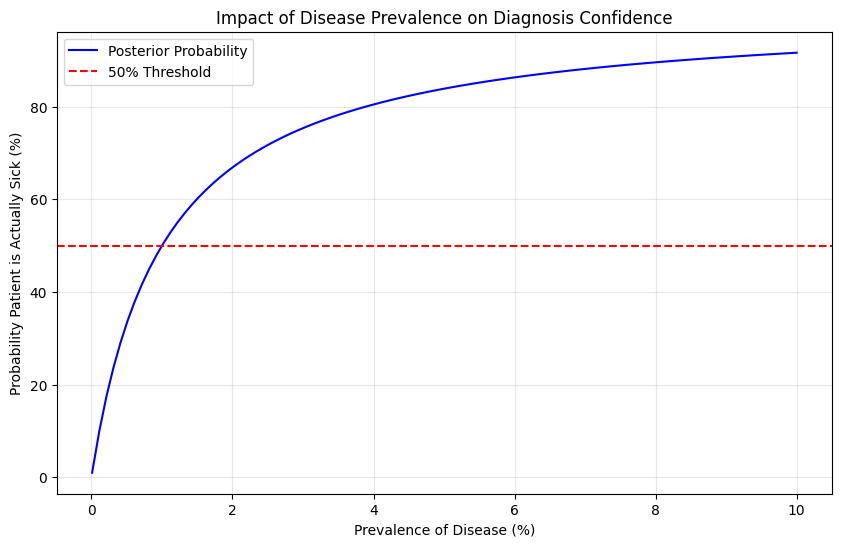

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================================
# EXERCISE 1: Medical Diagnosis (Student Template)
# ==========================================

# ---------------------------------------------------------
# PART A: Setup & Frequentist Perspective
# ---------------------------------------------------------

# 1. Define the known probabilities (Change None to the numeric values)
p_disease = 0.0001  # Prevalence: P(E)
sensitivity = 0.99  # True Positive Rate: P(Pos | E)
specificity = 0.98  # True Negative Rate: P(Neg | not E)

# 2. Calculate Error Rates
# TODO: Calculate the False Positive Rate (Probability of false alarm)
false_positive_rate = 1 - sensitivity

# TODO: Calculate the False Negative Rate
false_negative_rate = 1 - specificity

print("--- Part A: Test Properties ---")
if p_disease is not None:
    print(f"Prevalence (Prior): {p_disease}")
    print(f"Sensitivity: {sensitivity}")
    print(f"Specificity: {specificity}")
    print(f"False Positive Rate: {false_positive_rate}")
else:
    print("Variables not yet defined.")


# ---------------------------------------------------------
# PART B: Bayesian Perspective
# ---------------------------------------------------------

# 1. Law of Total Probability
# TODO: Calculate P(Pos)
# Formula: P(Pos) = P(Pos|E)*P(E) + P(Pos|not E)*P(not E)
p_pos = sensitivity * p_disease + false_positive_rate * (1 - p_disease)

# 2. Bayes' Theorem
# TODO: Calculate the Posterior Probability P(E | Pos)
# Formula: P(E | Pos) = (P(Pos | E) * P(E)) / P(Pos)
posterior_probability = sensitivity * p_disease / p_pos

print("\n--- Part B: Bayesian Calculation ---")
if p_pos is not None:
    print(f"Total Probability of Positive Test P(Pos): {p_pos:.5f}")
    print(f"Posterior Probability P(Disease | Positive): {posterior_probability:.5f}")
    print(f"Result in Percentage: {posterior_probability * 100:.2f}%")
else:
    print("Calculations not yet performed.")


# ---------------------------------------------------------
# PART C: Sensitivity Analysis (Bonus Visualization)
# ---------------------------------------------------------
# Objective: Visualize how the posterior probability changes as
# the disease becomes more common (Prevalence increases).

print("\n--- Part C: Generating Visualization ---")

# We create a range of prevalence values from 0.0001 (rare) to 0.1 (common)
prevalence_range = np.linspace(0.0001, 0.1, 100)
posterior_values = []

if sensitivity is not None and false_positive_rate is not None:
    for prev in prevalence_range:
        # TODO: Re-calculate P(Pos) for this specific 'prev' (Variable: prev)
        # Note: Use the 'sensitivity' and 'false_positive_rate' defined in Part A
        p_pos_i = sensitivity * prev + false_positive_rate * (1 - prev)

        # TODO: Calculate Posterior P(E | Pos) for this loop iteration
        post_i = sensitivity * prev / p_pos_i

        # We append the result to the list for plotting
        if post_i is not None:
            posterior_values.append(post_i)
        else:
            posterior_values.append(0)  # Placeholder to avoid crash if logic is missing

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(
        prevalence_range * 100,
        np.array(posterior_values) * 100,
        label="Posterior Probability",
        color="blue",
    )
    plt.title("Impact of Disease Prevalence on Diagnosis Confidence")
    plt.xlabel("Prevalence of Disease (%)")
    plt.ylabel("Probability Patient is Actually Sick (%)")
    plt.grid(True, alpha=0.3)
    plt.axhline(y=50, color="r", linestyle="--", label="50% Threshold")
    plt.legend()
    plt.show()
else:
    print("Cannot plot: Variables from Part A are missing.")

# PART D: Interpretation

QUESTION: 
Look at the graph generated in Part C. 
At roughly what prevalence percentage does the test become "reliable" (i.e., > 50% probability that a positive result is true)?

STUDENT ANSWER: